#Explicação do Problema
Contexto:
A COVID-19 é uma doença respiratória causada pelo vírus SARS-CoV-2. Uma das formas de diagnosticar a doença é por meio de imagens de raios-X de tórax, que podem mostrar padrões característicos de infecção pulmonar. No entanto, a análise manual dessas imagens por radiologistas pode ser demorada e sujeita a erros, especialmente em regiões com alta demanda por diagnósticos.

Objetivo:
O objetivo deste projeto é automatizar o diagnóstico de COVID-19 a partir de imagens de raios-X de tórax, utilizando técnicas de aprendizado profundo (deep learning). A ideia é treinar uma rede neural convolucional (CNN) para identificar padrões nas imagens que diferenciem casos de COVID-19 de casos normais.

# Importações necessárias

In [ ]:

from google.colab import files
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


#Define os caminhos das pastas

In [ ]:
#Define os caminhos das pastas
diretorio_base = 'dataset/archive/dataset'
diretorio_covid = os.path.join(diretorio_base, 'covid')  #Pasta de imagens COVID-19
diretorio_normal = os.path.join(diretorio_base, 'normal')  #Pasta de imagens normais

#Verifica se as pastas existem
if os.path.exists(diretorio_covid) and os.path.exists(diretorio_normal):
    print("Pastas encontradas com sucesso!")
else:
    print("Erro: Pastas não encontradas.")

Pastas encontradas com sucesso!


#Carregar imagens e converter listas para arrays numpy


In [ ]:
#Carrega as imagens e rótulos
imagens = []
rotulos = []

#Carrega imagens COVID-19
for caminho_imagem in os.listdir(diretorio_covid):
    imagem = load_img(os.path.join(diretorio_covid, caminho_imagem), target_size=(150, 150))  #Redimensiona a imagem
    array_imagem = img_to_array(imagem)  #Converte para array numpy
    imagens.append(array_imagem)
    rotulos.append(1)  #Rótulo 1 para COVID-19

#Carrega imagens normais
for caminho_imagem in os.listdir(diretorio_normal):
    imagem = load_img(os.path.join(diretorio_normal, caminho_imagem), target_size=(150, 150))  #Redimensiona a imagem
    array_imagem = img_to_array(imagem)  #Converte para array numpy
    imagens.append(array_imagem)
    rotulos.append(0)  #Rótulo 0 para Normal

#Converte as listas para arrays numpy
imagens = np.array(imagens)
rotulos = np.array(rotulos)
print(f'Total de imagens carregadas: {len(imagens)}')
print(f'Formato das imagens: {imagens.shape}')
print(f'Formato dos rótulos: {rotulos.shape}')

Total de imagens carregadas: 94
Formato das imagens: (94, 150, 150, 3)
Formato dos rótulos: (94,)


#Divide o dataset em treino (80%) e teste (20%)

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(imagens, rotulos, test_size=0.2, random_state=42)
print(f'Tamanho do conjunto de treino: {len(X_treino)}')
print(f'Tamanho do conjunto de teste: {len(X_teste)}')


Tamanho do conjunto de treino: 75
Tamanho do conjunto de teste: 19


#Normaliza as imagens

In [ ]:
X_treino = X_treino / 255.0
X_teste = X_teste / 255.0

#Exibindo imagens de treino e teste.


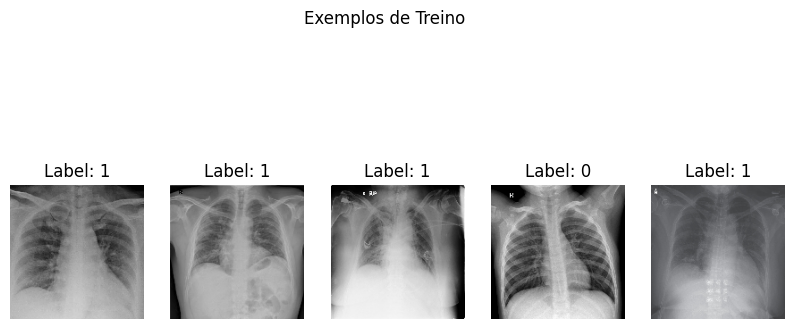

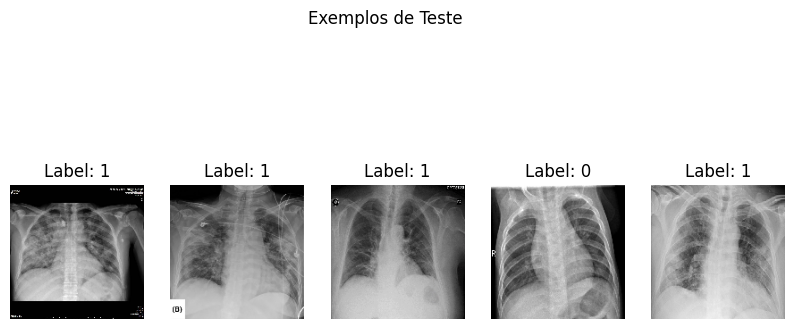

In [ ]:
def exibir_imagens(imagens, rotulos, titulo):
    plt.figure(figsize=(10, 5))
    for i in range(5):  # Mostra as primeiras 5 imagens
        plt.subplot(1, 5, i+1)
        plt.imshow(imagens[i], cmap='gray')
        plt.title(f'Label: {rotulos[i]}')
        plt.axis('off')
    plt.suptitle(titulo)
    plt.show()

# Exibe imagens de treino
exibir_imagens(X_treino, y_treino, 'Exemplos de Treino')

# Exibe imagens de teste
exibir_imagens(X_teste, y_teste, 'Exemplos de Teste')

#Definir arquitetura da CNN, compilação do modelo e resumo da arquitetura


In [ ]:
#Define a arquitetura da CNN
modelo = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  #Primeira camada convolucional
    MaxPooling2D(pool_size=(2, 2)),  #Camada de pooling
    Conv2D(64, (3, 3), activation='relu'),  #Segunda camada convolucional
    MaxPooling2D(pool_size=(2, 2)),  #Camada de pooling
    Conv2D(128, (3, 3), activation='relu'),  #Terceira camada convolucional
    MaxPooling2D(pool_size=(2, 2)),  #Camada de pooling
    Flatten(),  #Achata a saída para uma camada densa
    Dense(512, activation='relu'),  #Camada densa
    Dropout(0.5),  #Dropout para evitar overfitting
    Dense(1, activation='sigmoid')  #Saída binária (COVID ou Normal)
])

#Compila o modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Resumo da arquitetura
modelo.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

#Treinamento do Modelo

In [ ]:
historico = modelo.fit(
    X_treino, y_treino,  #Dados de treino
    epochs=20,  #Número de épocas
    batch_size=32,  #Tamanho do lote
    validation_data=(X_teste, y_teste)  #Dados de validação
)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6097 - loss: 1.2626 - val_accuracy: 0.8421 - val_loss: 0.3658
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7233 - loss: 0.5414 - val_accuracy: 0.8421 - val_loss: 0.4350
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7550 - loss: 0.5723 - val_accuracy: 0.9474 - val_loss: 0.2986
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9343 - loss: 0.3630 - val_accuracy: 1.0000 - val_loss: 0.1767
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9828 - loss: 0.1752 - val_accuracy: 1.0000 - val_loss: 0.1260
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9632 - loss: 0.1128 - val_accuracy: 1.0000 - val_loss: 0.0838
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9605 - loss: 0.0742 - val_accuracy: 1.0000 - val_loss: 0.0391
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 9/20
3/3 ━

#Plota as curvas de perda e acurácia

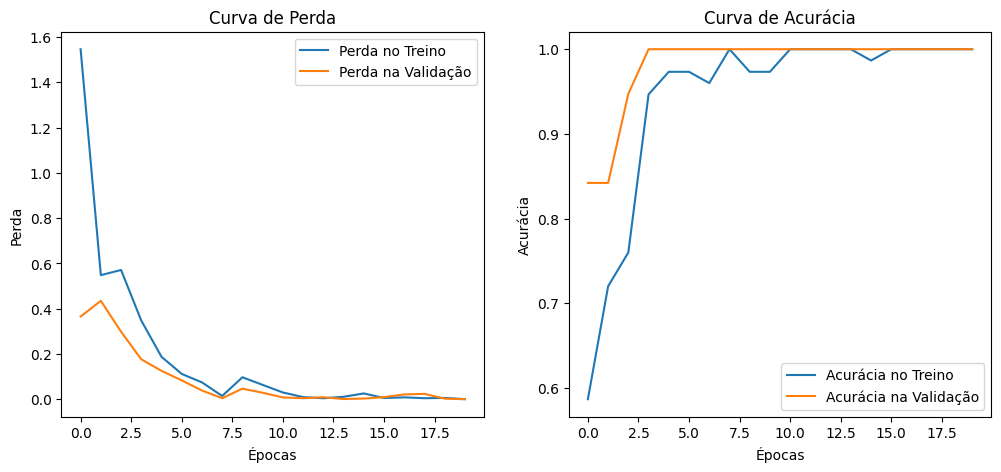

In [ ]:
plt.figure(figsize=(12, 5))

#Curva de perda
plt.subplot(1, 2, 1)
plt.plot(historico.history['loss'], label='Perda no Treino')
plt.plot(historico.history['val_loss'], label='Perda na Validação')
plt.title('Curva de Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

#Curva de acurácia
plt.subplot(1, 2, 2)
plt.plot(historico.history['accuracy'], label='Acurácia no Treino')
plt.plot(historico.history['val_accuracy'], label='Acurácia na Validação')
plt.title('Curva de Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

#Avalia o modelo no conjunto de teste e Calcula métricas

In [ ]:

previsoes = modelo.predict(X_teste)
previsoes = (previsoes > 0.5).astype(int)  #Converte probabilidades em classes binárias


acuracia = accuracy_score(y_teste, previsoes)
f1 = f1_score(y_teste, previsoes)
precisao = precision_score(y_teste, previsoes)
recall = recall_score(y_teste, previsoes)

print(f'Acurácia: {acuracia:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'Precisão: {precisao:.2f}')
print(f'Recall: {recall:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
Acurácia: 1.00
F1-Score: 1.00
Precisão: 1.00
Recall: 1.00


#Matriz de confusão

In [ ]:

matriz_confusao = confusion_matrix(y_teste, previsoes)
print('Matriz de Confusão:')
print(matriz_confusao)


Matriz de Confusão:
[[ 3  0]
 [ 0 16]]
